In [13]:
# Constants

LEARNING_RATE = 0.05
NUM_ITER = 2048
TARGET_CLASS = 36   # terrapin

ROTATION_DEG = 5
IMG_HEIGHT, IMG_WIDTH = 224, 224
JITTER_PX = 16
SCALE_FACTOR = 0.2

OPTIM_CHANNEL = 32

OPTIM_NODE = 256

In [2]:
# Imports and Model

import torchvision.models.alexnet as alexnet
from torchvision.models import AlexNet_Weights
from torchvision.transforms import v2
import torch
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF

model = alexnet(weights = AlexNet_Weights.IMAGENET1K_V1)
model.eval()
preprocess = AlexNet_Weights.IMAGENET1K_V1.transforms()

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 179MB/s]


# Classes

Iteration 100/2048: Loss: -807.9851684570312
Iteration 200/2048: Loss: -926.121337890625
Iteration 300/2048: Loss: -953.0489501953125
Iteration 400/2048: Loss: -968.83154296875
Iteration 500/2048: Loss: -980.569091796875
Iteration 600/2048: Loss: -991.4249267578125
Iteration 700/2048: Loss: -998.9013061523438
Iteration 800/2048: Loss: -1005.1860961914062
Iteration 900/2048: Loss: -1011.0673828125
Iteration 1000/2048: Loss: -1015.6993408203125
Iteration 1100/2048: Loss: -1020.8433837890625
Iteration 1200/2048: Loss: -1026.45751953125
Iteration 1300/2048: Loss: -1032.0225830078125
Iteration 1400/2048: Loss: -1038.197265625
Iteration 1500/2048: Loss: -1042.106689453125
Iteration 1600/2048: Loss: -1044.7811279296875
Iteration 1700/2048: Loss: -1047.0301513671875
Iteration 1800/2048: Loss: -1049.9608154296875
Iteration 1900/2048: Loss: -1052.1688232421875
Iteration 2000/2048: Loss: -1054.4425048828125


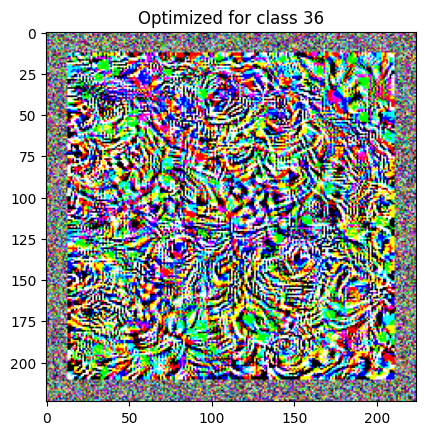

In [ ]:
# Naive

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

for i in range(NUM_ITER):
  optimizer.zero_grad()
  preprocessed_image = preprocess(image)

  out = model(preprocessed_image)

  loss = -out[0, TARGET_CLASS]
  loss.backward()
  optimizer.step()


  with torch.no_grad():
    image.data.clamp_(0, 1)

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone().squeeze(0)
plt.imshow(TF.to_pil_image(final_image))
plt.title(f"Optimized for class {TARGET_CLASS}")
plt.show()


Iteration 100/2048: Loss: -180.66921997070312
Iteration 200/2048: Loss: -286.6250305175781
Iteration 300/2048: Loss: -226.67620849609375
Iteration 400/2048: Loss: -278.18524169921875
Iteration 500/2048: Loss: -323.7611389160156
Iteration 600/2048: Loss: -336.082763671875
Iteration 700/2048: Loss: -318.41473388671875
Iteration 800/2048: Loss: -311.84918212890625
Iteration 900/2048: Loss: -344.32958984375
Iteration 1000/2048: Loss: -328.7395935058594
Iteration 1100/2048: Loss: -338.05816650390625
Iteration 1200/2048: Loss: -350.2536926269531
Iteration 1300/2048: Loss: -342.3666076660156
Iteration 1400/2048: Loss: -286.9786376953125
Iteration 1500/2048: Loss: -393.8060302734375
Iteration 1600/2048: Loss: -375.7566223144531
Iteration 1700/2048: Loss: -400.329345703125
Iteration 1800/2048: Loss: -310.9297180175781
Iteration 1900/2048: Loss: -318.5292663574219
Iteration 2000/2048: Loss: -352.70892333984375


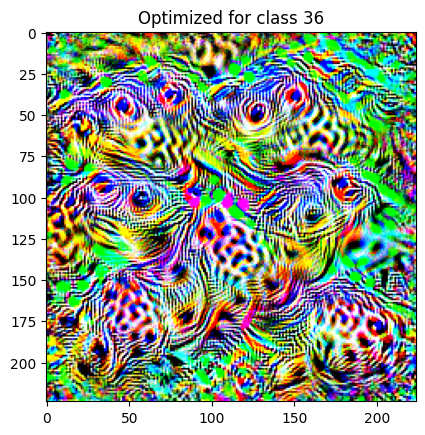

In [ ]:
# Transformation Robustness

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  transformed_image = transforms(image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)

  loss = -out[0, TARGET_CLASS]
  loss.backward()
  optimizer.step()

  with torch.no_grad():
    image.data.clamp_(0, 1)

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone().squeeze(0)
plt.imshow(TF.to_pil_image(final_image))
plt.title(f"Optimized for class {TARGET_CLASS}")
plt.show()


Iteration 100/2048: Loss: -621.9552001953125
Iteration 200/2048: Loss: -777.914306640625
Iteration 300/2048: Loss: -820.2814331054688
Iteration 400/2048: Loss: -838.9620361328125
Iteration 500/2048: Loss: -849.7908935546875
Iteration 600/2048: Loss: -856.2243041992188
Iteration 700/2048: Loss: -860.618408203125
Iteration 800/2048: Loss: -863.8082275390625
Iteration 900/2048: Loss: -866.2157592773438
Iteration 1000/2048: Loss: -868.0189208984375
Iteration 1100/2048: Loss: -869.5511474609375
Iteration 1200/2048: Loss: -870.739013671875
Iteration 1300/2048: Loss: -871.7857666015625
Iteration 1400/2048: Loss: -872.4917602539062
Iteration 1500/2048: Loss: -873.076416015625
Iteration 1600/2048: Loss: -873.5677490234375
Iteration 1700/2048: Loss: -873.9554443359375
Iteration 1800/2048: Loss: -874.361328125
Iteration 1900/2048: Loss: -874.6875
Iteration 2000/2048: Loss: -874.928955078125


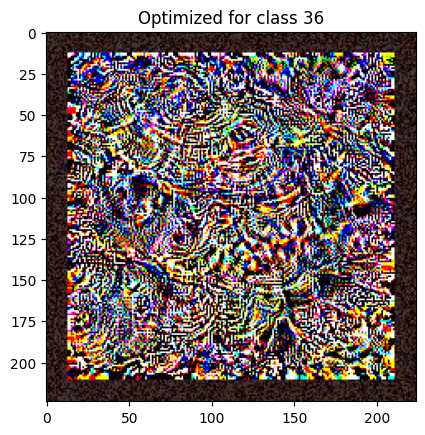

In [ ]:
# Decorrelation

# color correlation matrix for imagenet
# https://github.com/tensorflow/lucid/blob/master/lucid/optvis/param/color.py
LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  preprocessed_image = preprocess(corr_image)

  out = model(preprocessed_image)

  loss = -out[0, TARGET_CLASS]
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for class {TARGET_CLASS}")
plt.show()

Iteration 100/2048: Loss: -156.83399963378906
Iteration 200/2048: Loss: -206.0522003173828
Iteration 300/2048: Loss: -231.1455535888672
Iteration 400/2048: Loss: -295.6209716796875
Iteration 500/2048: Loss: -256.9990539550781
Iteration 600/2048: Loss: -306.900146484375
Iteration 700/2048: Loss: -298.0719299316406
Iteration 800/2048: Loss: -282.33697509765625
Iteration 900/2048: Loss: -269.70831298828125
Iteration 1000/2048: Loss: -316.6459655761719
Iteration 1100/2048: Loss: -328.83575439453125
Iteration 1200/2048: Loss: -328.30517578125
Iteration 1300/2048: Loss: -279.6261901855469
Iteration 1400/2048: Loss: -304.2692565917969
Iteration 1500/2048: Loss: -322.58740234375
Iteration 1600/2048: Loss: -292.4201965332031
Iteration 1700/2048: Loss: -309.23504638671875
Iteration 1800/2048: Loss: -321.10247802734375
Iteration 1900/2048: Loss: -370.8692321777344
Iteration 2000/2048: Loss: -292.0955810546875


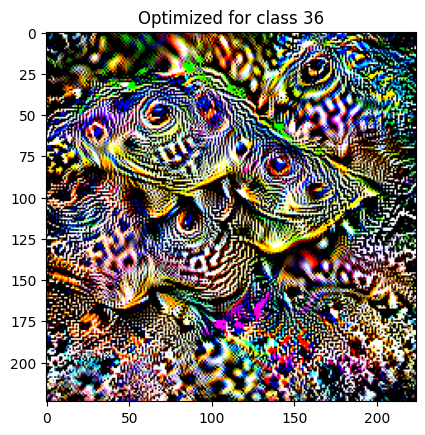

In [3]:
# Decorrelation + Transformation Robustness

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  transformed_image = transforms(corr_image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)

  loss = -out[0, TARGET_CLASS]
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for class {TARGET_CLASS}")
plt.show()

# Channels/Nodes

In [4]:
activation = {}

def wrapper(name):
  def hook(module, input, output):
    activation[name] = output
  return hook

conv_indices = [0, 3, 6, 8, 10]
for i in conv_indices:
  model.features[i].register_forward_hook(wrapper("features-" + str(i)))

linear_indices = [1, 4]
for i in linear_indices:
  model.classifier[i].register_forward_hook(wrapper("classifier-"+str(i)))

Iteration 100/2048: Loss: -8.069062232971191
Iteration 200/2048: Loss: -8.733084678649902
Iteration 300/2048: Loss: -8.395246505737305
Iteration 400/2048: Loss: -8.729314804077148
Iteration 500/2048: Loss: -8.999494552612305
Iteration 600/2048: Loss: -8.030882835388184
Iteration 700/2048: Loss: -8.782573699951172
Iteration 800/2048: Loss: -8.784744262695312
Iteration 900/2048: Loss: -8.650237083435059
Iteration 1000/2048: Loss: -8.590887069702148
Iteration 1100/2048: Loss: -8.823135375976562
Iteration 1200/2048: Loss: -8.751080513000488
Iteration 1300/2048: Loss: -9.086115837097168
Iteration 1400/2048: Loss: -8.557663917541504
Iteration 1500/2048: Loss: -8.87653636932373
Iteration 1600/2048: Loss: -8.846321105957031
Iteration 1700/2048: Loss: -8.856250762939453
Iteration 1800/2048: Loss: -9.067025184631348
Iteration 1900/2048: Loss: -8.764372825622559
Iteration 2000/2048: Loss: -8.708053588867188


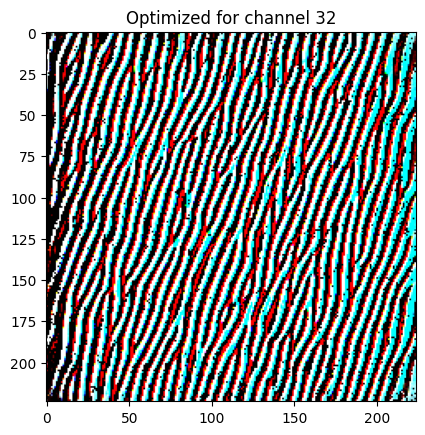

In [7]:
# Convolution Index 0

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  transformed_image = transforms(corr_image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)
  feature_map = activation["features-0"][0, OPTIM_CHANNEL, :, :]

  loss = -torch.mean(feature_map)
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for channel {OPTIM_CHANNEL}")
plt.show()

Iteration 100/2048: Loss: -26.096343994140625
Iteration 200/2048: Loss: -65.35334014892578
Iteration 300/2048: Loss: -76.09930419921875
Iteration 400/2048: Loss: -87.91354370117188
Iteration 500/2048: Loss: -87.3021469116211
Iteration 600/2048: Loss: -90.25263977050781
Iteration 700/2048: Loss: -96.34791564941406
Iteration 800/2048: Loss: -89.88581848144531
Iteration 900/2048: Loss: -84.6538314819336
Iteration 1000/2048: Loss: -86.32648468017578
Iteration 1100/2048: Loss: -86.61093139648438
Iteration 1200/2048: Loss: -93.37178802490234
Iteration 1300/2048: Loss: -85.54457092285156
Iteration 1400/2048: Loss: -97.35083770751953
Iteration 1500/2048: Loss: -102.36137390136719
Iteration 1600/2048: Loss: -105.17691040039062
Iteration 1700/2048: Loss: -94.46759796142578
Iteration 1800/2048: Loss: -97.01737976074219
Iteration 1900/2048: Loss: -97.79222869873047
Iteration 2000/2048: Loss: -105.06047821044922


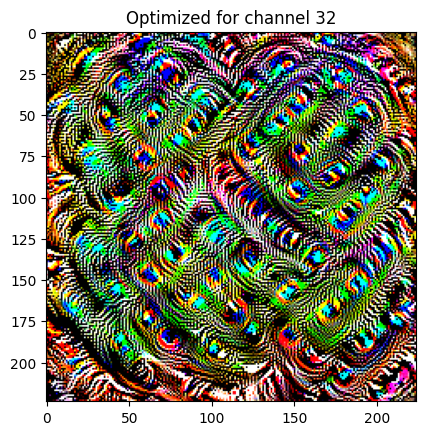

In [8]:
# Convolution Index 10

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  transformed_image = transforms(corr_image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)
  feature_map = activation["features-10"][0, OPTIM_CHANNEL, :, :]

  loss = -torch.mean(feature_map)
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for channel {OPTIM_CHANNEL}")
plt.show()

Iteration 100/2048: Loss: -116.82307434082031
Iteration 200/2048: Loss: -201.19235229492188
Iteration 300/2048: Loss: -260.1582336425781
Iteration 400/2048: Loss: -225.31027221679688
Iteration 500/2048: Loss: -254.1163330078125
Iteration 600/2048: Loss: -260.2530517578125
Iteration 700/2048: Loss: -297.17156982421875
Iteration 800/2048: Loss: -302.62738037109375
Iteration 900/2048: Loss: -288.8993225097656
Iteration 1000/2048: Loss: -332.94390869140625
Iteration 1100/2048: Loss: -282.50836181640625
Iteration 1200/2048: Loss: -269.32318115234375
Iteration 1300/2048: Loss: -239.52560424804688
Iteration 1400/2048: Loss: -343.8055419921875
Iteration 1500/2048: Loss: -304.40380859375
Iteration 1600/2048: Loss: -313.239013671875
Iteration 1700/2048: Loss: -314.7725524902344
Iteration 1800/2048: Loss: -322.7938232421875
Iteration 1900/2048: Loss: -317.862548828125
Iteration 2000/2048: Loss: -308.14447021484375


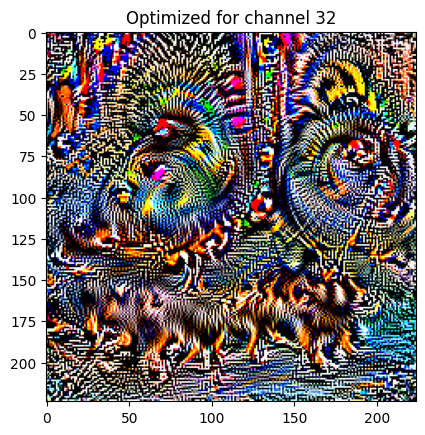

In [ ]:
# Linear Index 1

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  transformed_image = transforms(corr_image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)
  feature_map = activation["classifier-1"][0, OPTIM_NODE]

  loss = -torch.mean(feature_map)
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for channel {OPTIM_CHANNEL}")
plt.show()

Iteration 100/2048: Loss: -69.27609252929688
Iteration 200/2048: Loss: -105.1227035522461
Iteration 300/2048: Loss: -121.17918395996094
Iteration 400/2048: Loss: -131.4687042236328
Iteration 500/2048: Loss: -129.84375
Iteration 600/2048: Loss: -131.61981201171875
Iteration 700/2048: Loss: -140.35565185546875
Iteration 800/2048: Loss: -146.88259887695312
Iteration 900/2048: Loss: -153.3084716796875
Iteration 1000/2048: Loss: -159.009033203125
Iteration 1100/2048: Loss: -163.3028106689453
Iteration 1200/2048: Loss: -146.90872192382812
Iteration 1300/2048: Loss: -161.01437377929688
Iteration 1400/2048: Loss: -164.42349243164062
Iteration 1500/2048: Loss: -138.43643188476562
Iteration 1600/2048: Loss: -157.5653076171875
Iteration 1700/2048: Loss: -148.81732177734375
Iteration 1800/2048: Loss: -147.38958740234375
Iteration 1900/2048: Loss: -169.57284545898438
Iteration 2000/2048: Loss: -180.7344970703125


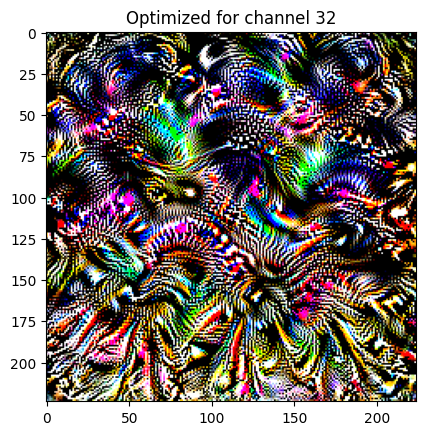

In [ ]:
# Linear Index 4

image = torch.rand((1, 3, IMG_HEIGHT, IMG_WIDTH), requires_grad = True)
optimizer = torch.optim.Adam([image], lr = LEARNING_RATE)

LUCID_COLOR_CORRELATION = torch.tensor([
    [0.26, 0.09, 0.02],
    [0.27, 0.00, -0.05],
    [0.27, -0.09, 0.03]
]).T

def correlate_image(image):
  permute_image = image.permute((0, 2, 3, 1))
  corr_image = torch.einsum("abcd, de -> abce", permute_image, LUCID_COLOR_CORRELATION)
  return corr_image.permute((0, 3, 1, 2)).clamp(0, 1)

transforms = v2.Compose([
    v2.Pad(padding = JITTER_PX),
    v2.RandomCrop(size = (IMG_HEIGHT, IMG_WIDTH)),
    v2.RandomResizedCrop(size = (IMG_HEIGHT, IMG_WIDTH), scale = (1-SCALE_FACTOR, 1)),
    v2.RandomRotation(ROTATION_DEG)
])

for i in range(NUM_ITER):
  optimizer.zero_grad()

  corr_image = correlate_image(image)

  transformed_image = transforms(corr_image.clone())

  preprocessed_image = preprocess(transformed_image)

  out = model(preprocessed_image)
  feature_map = activation["classifier-4"][0, OPTIM_NODE]

  loss = -torch.mean(feature_map)
  loss.backward()
  optimizer.step()

  if (i + 1) % 100 == 0:
    print(f"Iteration {i + 1}/{NUM_ITER}: Loss: {loss.item()}")

final_image = image.detach().clone()
final_corr_image = correlate_image(final_image).squeeze(0)
plt.imshow(TF.to_pil_image(final_corr_image))
plt.title(f"Optimized for channel {OPTIM_CHANNEL}")
plt.show()